In [1]:
from math import pi, sin, cos, tan
from matplotlib import pyplot as plt
import pickle
import numpy as np

%matplotlib inline



class Car:
    
    fps       = 16.0     # frames per second
    dt        = 1.0 / fps # time per frame
    max_steer = 30.0      # degrees
    L         = 4.0       # meters
    max_a     = 2 * 9.8   # m/s/s
    max_brake = 5 * 9.8   
    
    def __init__(self):
        # state variables
        self.x     = 0.0
        self.y     = 0.0
        self.theta = 0.0  # east
        self.speed = 0.0
        self.omega = 0.0
        self.t     = 0.0
        
        # driver controllable
        self.a_y   = 0.0
        self.alpha = 0.0
        
        # state history
        self.history = [(0,0,0,0,0,0,0,0)]
        
        self.braking = False
        self.backing = False
        
    def reverse(self):
        self.a_y = 0.0
        self.backing = True
        
    def forward(self):
        self.a_y = 0.0
        self.backing = False

    def steer(self, angle):
        assert -self.max_steer <= angle <= self.max_steer
        self.alpha = angle * pi / 180
    
    def gas(self, amount):
        assert -1.0 <= amount <= 1.0
        self.a_y = amount * self.max_a
        
#     def brake(self, amount):
#         assert 0.0 <= amount <= 1.0
#         sgn = -1.0
#         if self.speed < 0.0:
#             sgn = 1.0
#         self.braking = True
#         self.a_y = sgn * amount * self.max_brake
    
    def go(self, duration):
        num_frames = int(duration / self.dt)
        for i in range(num_frames):
            snapshot = (
                self.t+self.dt,    # 
                self.a_y,  # 
                self.speed,#
                self.x,    
                self.y,    
                self.theta,
                self.omega, #
                self.alpha,#
            )
            self.history.append(snapshot)
            self.increment_frame()
    
    def increment_frame(self):
        new_t      = self.t + self.dt
        new_a_y    = self.a_y
        new_speed  = self.speed + self.a_y * self.dt
        if self.backing:
            new_speed  = self.speed - self.a_y * self.dt 
        new_alpha  = self.alpha
        new_omega  = self.speed / self.L * tan(self.alpha)
        new_theta  = (self.theta + self.omega * self.dt) % (2*pi)
        
        # intermediate steps for x, y
        distance   = self.speed * self.dt
        dx         = distance * cos(self.theta)
        dy         = distance * sin(self.theta)
        
        new_x      = self.x + dx
        new_y      = self.y + dy
        
        self.t     = new_t
        self.a_y   = new_a_y
        self.speed = new_speed
        self.alpha = new_alpha
        self.omega = new_omega
        self.theta = new_theta
        self.x     = new_x
        self.y     = new_y
        
    def show_history(self, increment=10):
        t, a, s, x, y, theta, omega, alpha = np.array(car.history).T
        plt.scatter(x[::increment],y[::increment])
        
    def show_history2(self, inc=10):
        t, a, s, x, y, theta, omega, alpha = np.array(car.history).T
        u = np.cos(theta)
        v = np.sin(theta)
#         m = np.hypot(u,v)
        Q = plt.quiver(x[::inc],y[::inc],u[::inc],v[::inc], 
                       units='x', pivot='tip')
        qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$1 \frac{m}{s}', 
                           labelpos='E', coordinates='figure' )
        
        
    def get_displacements(self):
        disp = 0
        displacements = [disp]
        t, a, s, x, y, theta, omega, alpha = np.array(car.history).T
        last_t = 0.0
        for ts, speed in zip(t[1:], s[1:] ):
            dt = ts - last_t
            dD = speed * dt
            disp += dD
            displacements.append(disp)
            last_t = ts
        return displacements
        
        
    def save_trajectory(self, filename):
        t, a, s, x, y, theta, omega, alpha = np.array(car.history).T
        displacements = self.get_displacements()
        assert(len(displacements) == len(t) )
        trajectory = zip(t, displacements, omega, a)
        with open(filename, 'wb') as f:
            pickle.dump(trajectory, f)
        print("saved trajectory to", filename)
            

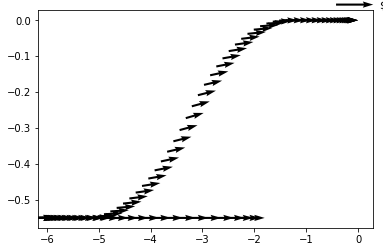

In [4]:
car = Car()


car.gas(-0.1)
car.steer(0.0)
car.go(1.0)

car.gas(0.0)
car.steer(-car.max_steer)
car.go(1.0)

car.steer(car.max_steer)
car.go(1.0)

car.steer(0.0)
car.go(0.2)

car.gas(0.15)
car.go(2.0)

car.gas(0.0)
car.go(0.2)


car.gas(-0.5)
car.go(0.41)

car.show_history2(1)

In [5]:
car.save_trajectory("parallel_park.pickle")

saved trajectory to parallel_park.pickle
